In [3]:
import os
import tarfile
import urllib.request
import pandas as pd

In [4]:
HOUSING_PATH = os.path.join("./datasets","housing")

In [5]:
HOUSING_URL = "https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.tgz?raw=true"

In [6]:
def fetch_housing_data(housing_url, housing_path):
  # https://www.geeksforgeeks.org/python-os-makedirs-method/
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data(HOUSING_URL, HOUSING_PATH)

In [7]:
def load_housing_data(housing_path):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt


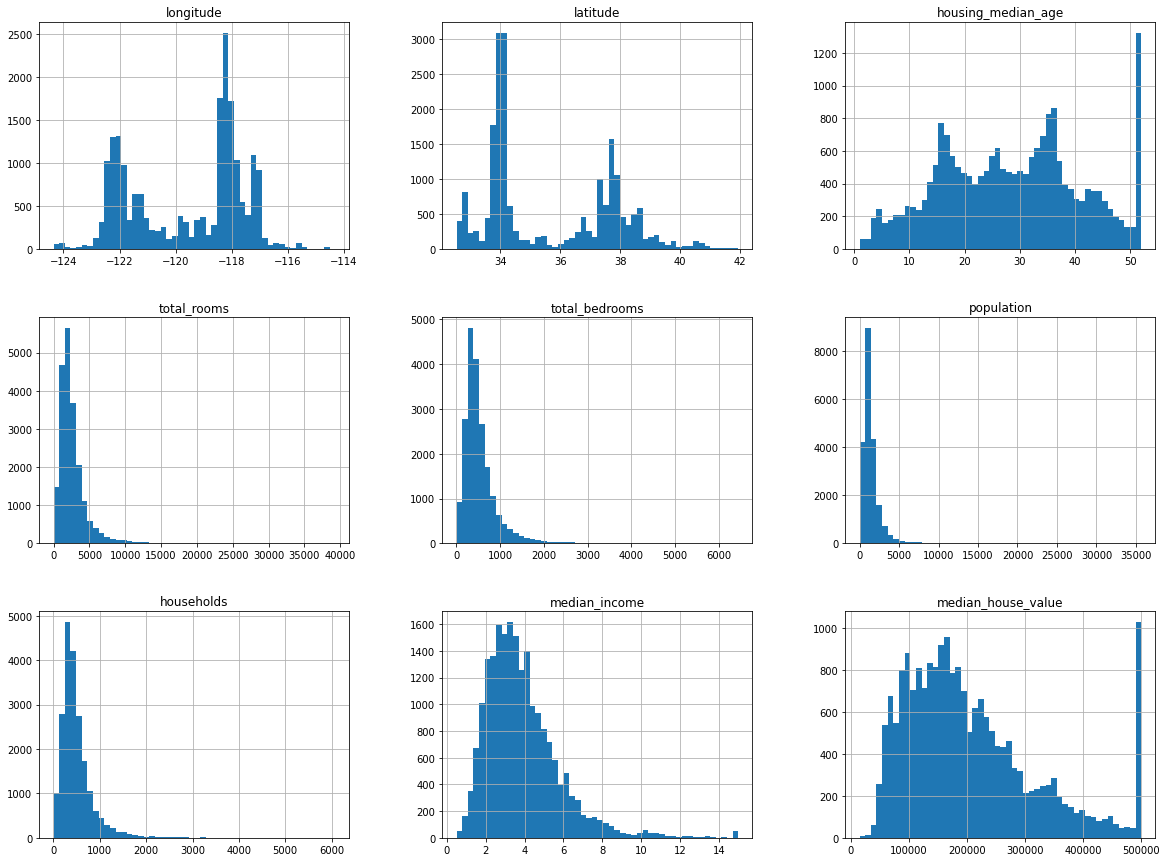

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np


In [15]:
train_data, test_data = train_test_split(housing, test_size = 0.2, random_state=42)

In [16]:
train_data.shape

(16512, 10)

In [17]:
test_data.shape

(4128, 10)

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

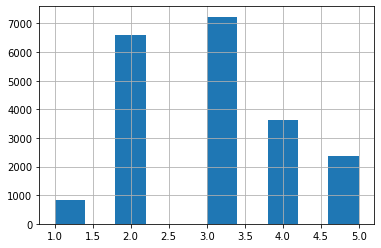

In [19]:
housing["income_cat"].hist()

In [20]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [21]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [22]:
train_data, test_data = train_test_split(housing, test_size = 0.2, random_state=42)

In [23]:
train_data["income_cat"].value_counts() / len(train_data)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [24]:
test_data["income_cat"].value_counts() / len(test_data)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [25]:

train_data["ocean_proximity"].value_counts() / len(train_data)


<1H OCEAN     0.444586
INLAND        0.316558
NEAR OCEAN    0.126332
NEAR BAY      0.112282
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [26]:
test_data["ocean_proximity"].value_counts() / len(test_data)

<1H OCEAN     0.434835
INLAND        0.320736
NEAR OCEAN    0.138566
NEAR BAY      0.105620
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [29]:
train_data["income_cat"].value_counts() / len(train_data)

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [30]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [31]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [32]:
# Day 16

In [33]:
type(strat_test_set)

pandas.core.frame.DataFrame

In [34]:
for set_ in (strat_test_set, strat_train_set):
  set_.drop("income_cat", axis=1, inplace = True)

In [35]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [36]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [37]:
# Discover and Visualize the Data

housing_data = strat_train_set.copy()

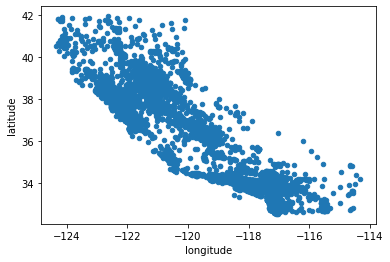

In [38]:
housing_data.plot(kind = "scatter", x = "longitude", y = "latitude")

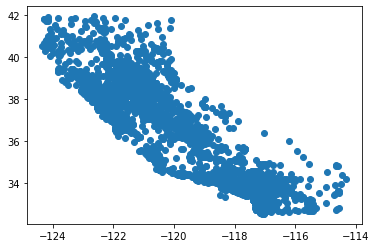

In [39]:
plt.scatter(x = "longitude", y = "latitude", data = housing_data)

In [40]:
import seaborn as sns

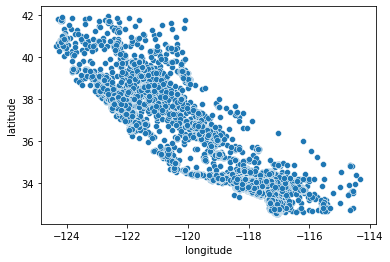

In [41]:
sns.scatterplot(x = "longitude", y = "latitude", data = housing_data)

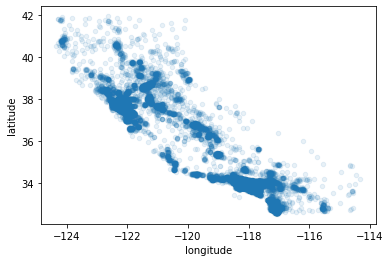

In [42]:
housing_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

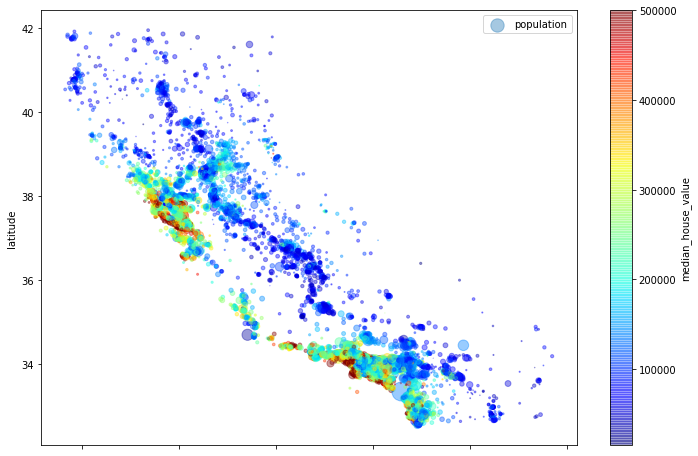

In [43]:
housing_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
                  s = housing_data["population"]/100, label = "population", figsize = (12, 8),
                  c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [44]:
corr_matrix = housing_data.corr()

In [45]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [46]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [47]:
from pandas.plotting import scatter_matrix

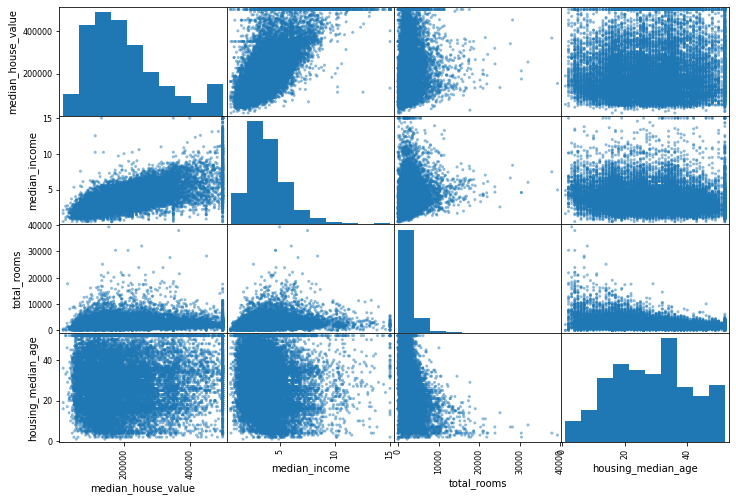

In [48]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing_data[attributes], figsize=(12,8))
plt.show()

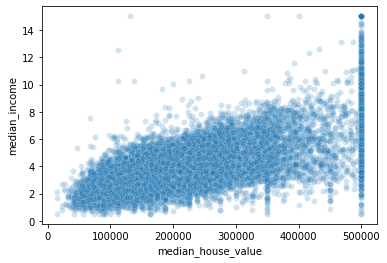

In [49]:
sns.scatterplot(x = "median_house_value", y = "median_income", data = housing_data, alpha = 0.2)

In [50]:
# Data Cleaning

In [51]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [52]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [53]:
housing_label

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [54]:
housing_opt1 = housing.dropna(subset=["total_bedrooms"])
housing_opt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [55]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [56]:
housing_opt2 = housing.drop("total_bedrooms", axis = 1)
housing_opt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [57]:
housing_opt3 = housing.copy()
median = housing_opt3["total_bedrooms"].median()

housing_opt3["total_bedrooms"].fillna(median, inplace = True)
housing_opt3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [58]:
from sklearn.impute import SimpleImputer

In [59]:
imputer = SimpleImputer(strategy="median")

In [60]:
housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [61]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [62]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [63]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [64]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = housing_num.index)

In [65]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [68]:
ordinal_encoder = OrdinalEncoder()

In [69]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [70]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [71]:
from sklearn.preprocessing import OneHotEncoder

In [72]:
cat_encoder = OneHotEncoder()

In [73]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [74]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [75]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [77]:
min_max_scaler = MinMaxScaler(feature_range=(1,5))

In [78]:
min_max_scaler.fit_transform([[4],[3],[2],[1],[4],[9]])

array([[2.5],
       [2. ],
       [1.5],
       [1. ],
       [2.5],
       [5. ]])

In [80]:
standard_scaler = StandardScaler()

In [81]:
standard_scaler.fit_transform([[5],[6],[1],[100]])

array([[-0.55273452],
       [-0.52870258],
       [-0.64886226],
       [ 1.73029937]])

## Transformation Pipeline

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [83]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler())
])

In [84]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [85]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [86]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [87]:
from sklearn.compose import ColumnTransformer

In [88]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)
])

In [89]:
housing_prepared = full_pipeline.fit_transform(housing)

In [91]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [92]:
# Training Model

# Linear Regression

from sklearn.linear_model import LinearRegression

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
lin_reg.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [95]:
some_data = housing.iloc[:50]
some_labels = housing_label.iloc[:50]

In [96]:
some_data_prepared = full_pipeline.transform(some_data)

In [97]:
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.49247384, -0.65929936, -0.92673619,  1.85619316,  2.41221109,
         2.72415407,  2.57097492, -0.44143679,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.69645635,  0.945009

In [98]:
lin_reg.predict(some_data_prepared)

array([211574.39523833, 321345.10513719, 210947.519838  ,  61921.01197837,
       192362.32961119, 154821.86099031, 426129.59146334, 229666.3616775 ,
       141483.54356476,  12084.19502002, 120017.72321809,  87775.9649296 ,
       320894.48822129, 113649.13999576, 127592.64669941, 206328.84177163,
       259618.28793671, 107633.93902536, 149046.67668443, 211456.19103483,
       222644.96988445, 438701.76791199, 215476.52927295, 153611.62409904,
        68981.41422777, 143130.78529464, 273736.63843115, 133980.45811019,
       180080.21728085, 261083.16624469, 292445.97725718, 214987.59769362,
       146574.06786144, 179909.1917818 , 282566.46837286, 310841.27853291,
        34055.69019296, 187645.45855267, 140033.0881313 , 237198.47615377,
       283087.79051061, 247064.422021  , 219001.85174194, 313890.97539613,
       197415.79525752, 213599.99899122, 103018.251863  , 266840.60708407,
       160682.50413339, 260527.52574652])

In [99]:
print(list(some_labels))

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0, 92100.0, 61500.0, 313000.0, 89000.0, 123900.0, 197400.0, 500001.0, 63300.0, 107000.0, 184200.0, 280900.0, 500001.0, 171300.0, 116600.0, 60800.0, 121100.0, 270700.0, 109900.0, 159600.0, 500001.0, 409100.0, 55000.0, 127500.0, 184400.0, 210500.0, 277300.0, 85000.0, 202100.0, 146600.0, 326600.0, 207300.0, 173900.0, 301700.0, 274800.0, 150800.0, 216700.0, 112000.0, 215400.0, 178700.0, 339300.0]


In [100]:
# Check performance

from sklearn.metrics import mean_squared_error

In [101]:
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [104]:
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [105]:
# Cross validation

In [106]:
from sklearn.model_selection import cross_val_score

In [110]:
scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                         scoring="neg_mean_squared_error", cv = 5)
tree_rmse_scores = np.sqrt(-scores)

In [111]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [66301.60776135 67419.41218316 70893.49998938 73205.7870573
 69861.71308233]
Mean:  69536.40401470338
Standard deviation:  2464.0401215378074


In [112]:
scores = cross_val_score(lin_reg, housing_prepared, housing_label,
                         scoring="neg_mean_squared_error", cv = 5)
linear_rmse_scores = np.sqrt(-scores)

In [113]:
display_scores(linear_rmse_scores)

Scores:  [67413.53854887 71430.44796564 69987.77129272 66991.68588258
 70383.57586264]
Mean:  69241.40391049172
Standard deviation:  1735.2727680810058


In [114]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
forest_reg = RandomForestRegressor()

In [116]:
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [119]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18422.689168270044

In [117]:
scores = cross_val_score(forest_reg, housing_prepared, housing_label,
                         scoring="neg_mean_squared_error", cv = 5)
forest_reg_rmse_scores = np.sqrt(-scores)

In [118]:
display_scores(forest_reg_rmse_scores)

Scores:  [47642.39140102 49736.16053632 51323.21614534 49578.92717018
 50826.34469057]
Mean:  49821.407988685474
Standard deviation:  1271.1807801408359


In [120]:
# Saving training model

In [121]:
import joblib

In [122]:
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [123]:
my_model_loaded = joblib.load("forest_reg.pkl")

In [124]:
my_model_loaded

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
# Fine tuninig of model

In [126]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = [
              {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}
]

In [128]:
forest_reg = RandomForestRegressor()

In [132]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

In [133]:
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [134]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [135]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [136]:
cvres = grid_search.cv_results_

In [137]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), [params])

64852.132319652104 [{'max_features': 2, 'n_estimators': 3}]
55554.23582119461 [{'max_features': 2, 'n_estimators': 10}]
53081.852366617575 [{'max_features': 2, 'n_estimators': 30}]
60361.49389551585 [{'max_features': 4, 'n_estimators': 3}]
53219.5229558056 [{'max_features': 4, 'n_estimators': 10}]
50684.09236423295 [{'max_features': 4, 'n_estimators': 30}]
59353.296562179494 [{'max_features': 6, 'n_estimators': 3}]
52518.45627407626 [{'max_features': 6, 'n_estimators': 10}]
50437.94992028669 [{'max_features': 6, 'n_estimators': 30}]
58452.69830163371 [{'max_features': 8, 'n_estimators': 3}]
52245.37084596873 [{'max_features': 8, 'n_estimators': 10}]
50350.58437588578 [{'max_features': 8, 'n_estimators': 30}]


In [138]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.15304281e-01, 1.10266798e-01, 4.93135066e-02, 2.89772882e-02,
       2.74108807e-02, 3.69369435e-02, 2.49607220e-02, 4.30285141e-01,
       1.59413307e-02, 1.51395571e-01, 1.06458587e-04, 3.14805930e-03,
       5.95301901e-03])

In [139]:
extra_attribs = ["room_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [146]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4302851406488235, 'median_income'),
 (0.15139557136632584, 'pop_per_hhold'),
 (0.11530428109250054, 'longitude'),
 (0.11026679830748366, 'latitude'),
 (0.049313506554662274, 'housing_median_age'),
 (0.03693694354602061, 'population'),
 (0.02897728820978016, 'total_rooms'),
 (0.027410880697680846, 'total_bedrooms'),
 (0.02496072201336282, 'households'),
 (0.015941330674728114, 'room_per_hhold'),
 (0.00595301900554787, 'INLAND'),
 (0.0031480592960922266, '<1H OCEAN'),
 (0.00010645858699156586, 'bedrooms_per_room')]

In [142]:
housing_prepared[:1]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [143]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']